In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split

## Dataset Importing

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML_Projects/Credit_card_fraud/creditcard.csv")

## Analysis

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [ ]:
df.duplicated().sum()

1081

In [ ]:
df.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

## EDA

In [ ]:
print(f"No Frauds {round(df['Class'].value_counts()[0]/len(df) * 100,2)}")
print(f"Frauds {round(df['Class'].value_counts()[1]/len(df) * 100,2)}")

No Frauds 99.83
Frauds 0.17


Text(0.5, 1.0, 'Count Plot of Frauds and No Frauds detected.')

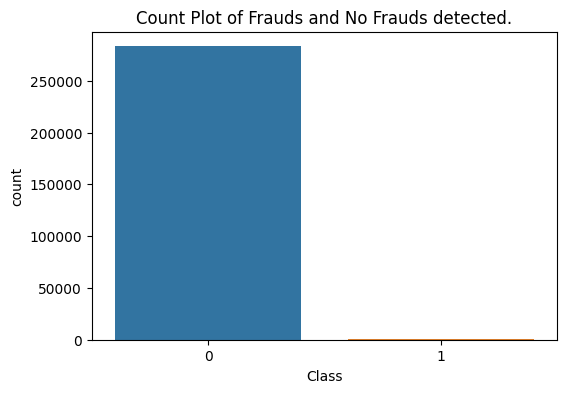

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='Class',hue='Class',legend=False)
plt.title("Count Plot of Frauds and No Frauds detected.")

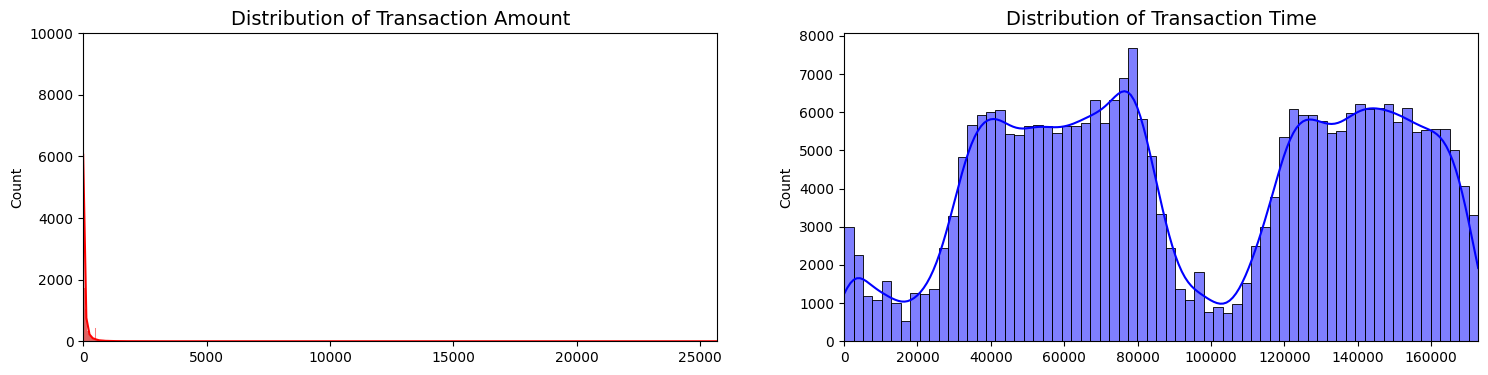

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.histplot(amount_val, ax=ax[0], color='r', kde=True)
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])
ax[0].set_ylim([0,10000])

sns.histplot(time_val, ax=ax[1], color='b', kde=True)
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()


In [ ]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
data = [go.Heatmap(z = np.array(df.corr().values),
                   x = np.array(df.corr().columns),
                   y = np.array(df.corr().columns),
                     colorscale='Viridis',)
       ]
layout = go.Layout(dict(title = 'Correlation Matrix for variables',
                            #autosize = False,
                            #height  = 1400,
                            #width   = 1600,
                            margin  = dict(r = 0 ,l = 100,
                                           t = 0,b = 100,
                                         ),
                            yaxis   = dict(tickfont = dict(size = 9)),
                            xaxis   = dict(tickfont = dict(size = 9)),
                           )
                      )

fig = go.Figure(data=data,layout = layout)
iplot(fig)

## Preprocessing

In [ ]:
legit = df[df.Class==0]
fraud = df[df.Class==1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(283253, 31)
(473, 31)


In [ ]:
legit.Amount.describe()

,Amount
count,283253.000000
mean,88.413575
std,250.379023
min,0.000000
25%,5.670000
50%,22.000000
75%,77.460000
max,25691.160000


In [ ]:
fraud.Amount.describe()

,Amount
count,473.000000
mean,123.871860
std,260.211041
min,0.000000
25%,1.000000
50%,9.820000
75%,105.890000
max,2125.870000


In [ ]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


In [ ]:
legit_sample = legit.sample(n=492)

In [ ]:
new_df = pd.concat([fraud,legit_sample],axis=0)

In [ ]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [ ]:
new_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
15294,26666.0,-0.413295,0.666216,0.935260,1.066676,1.183461,0.772896,0.543389,0.106298,-0.469134,...,-0.034408,0.103029,-0.253570,-1.274556,0.087127,-0.158578,0.175937,0.137320,26.62,0
248840,154120.0,-0.504910,0.971089,-0.792026,-0.519204,0.697393,-0.892935,0.667104,0.127088,0.361581,...,-0.365552,-0.969375,0.306157,0.419055,-0.445551,0.080928,-0.334056,-0.197106,8.98,0
145151,86677.0,1.752892,-1.465036,-0.748084,-0.579193,-0.533662,1.362794,-1.185750,0.560573,0.173497,...,-0.350316,-0.699809,0.363858,-1.763096,-0.817188,-0.499347,0.071684,-0.036285,121.27,0
167976,118997.0,2.078174,-0.382654,-1.393091,-0.665454,-0.110449,-0.932313,0.014075,-0.183968,0.808331,...,-0.238443,-0.557377,0.245914,-0.307549,-0.266609,0.642009,-0.108264,-0.085288,4.00,0
107505,70464.0,-0.684187,0.400631,2.629921,0.269881,0.058443,-0.301927,0.343991,-0.075552,0.402888,...,0.014848,0.312006,-0.156320,0.396376,-0.111594,-0.623036,-0.007130,-0.074308,9.99,0


In [ ]:
new_df.Class.value_counts()

,count
Class,
0,492
1,473


In [ ]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,97764.353659,0.032191,-0.158186,-0.010712,0.013442,-0.004565,-0.033427,0.013249,0.021948,0.007816,...,-0.034556,0.027866,-0.006842,0.005124,-0.018469,-0.039727,0.018781,-0.009789,0.011904,101.083394
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


## Target Data Split

In [ ]:
## Splitting the data

X = new_df.drop(columns=['Class'],axis=1)
y = new_df['Class']

In [ ]:
print(X.shape)

(965, 30)


In [ ]:
print(y.shape)

(965,)


## Train Test Data Split

In [ ]:
## Splitting into training and testing data

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2,stratify=y)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(772, 30)
(772,)
(193, 30)
(193,)


## Model Building

In [ ]:
## MOdel Training

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
## Accuracy

from sklearn.metrics import accuracy_score,f1_score

y_train_pred = model.predict(X_train)

In [ ]:
print(accuracy_score(y_train,y_train_pred))

0.9404145077720207


In [ ]:
y_test_pred = model.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_test_pred))

0.9326424870466321


In [ ]:
f1_score(y_train,y_train_pred)

0.9376693766937669

In [ ]:
f1_score(y_test,y_test_pred)

0.93048128342246

### Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

In [ ]:
models = {
    # Logistic Regression
    "Logistic Regression": LogisticRegression(
        penalty='l2',         # Regularization term (default 'l2')
        C=1.0,                # Inverse of regularization strength
        solver='lbfgs',       # Solver for optimization
        max_iter=100,         # Maximum number of iterations
        random_state=42
    ),

    # Decision Tree Classifier
    "DecisionTree Classifier": DecisionTreeClassifier(
        criterion='gini',     # 'gini' for Gini Impurity, 'entropy' for Information Gain
        max_depth=None,       # Maximum depth of the tree
        min_samples_split=2,  # Minimum number of samples required to split a node
        random_state=42
    ),

    # Random Forest Classifier
    "Random Forest Classifier": RandomForestClassifier(
        n_estimators=100,     # Number of trees in the forest
        criterion='gini',     # Criterion to measure split quality ('gini' or 'entropy')
        max_depth=None,       # Maximum depth of each tree
        min_samples_split=2,  # Minimum number of samples required to split a node
        random_state=42
    ),

    # Gradient Boosting Classifier
    "Gradient Boosting Classifier": GradientBoostingClassifier(
        n_estimators=100,     # Number of boosting stages
        learning_rate=0.1,    # Shrinks the contribution of each tree
        max_depth=3,          # Maximum depth of individual estimators
        random_state=42
    ),

    # XGBoost (Optimized version of GBM)
    "Xg Boost": XGBClassifier(
        n_estimators=100,     # Number of boosting rounds
        learning_rate=0.1,    # Step size shrinkage
        max_depth=3,          # Maximum depth of a tree
        subsample=0.8,        # Subsample ratio of the training instance
        colsample_bytree=0.8, # Subsample ratio of columns when constructing each tree
        random_state=42
    ),

    # XGBoost Classifier
    "XGBClassifier": XGBClassifier(
        n_estimators=100,     # Number of boosting rounds
        max_depth=3,          # Maximum depth of a tree
        learning_rate=0.1,    # Step size shrinkage
        random_state=42
    ),

    # Support Vector Classifier (SVM)
    "SVM": SVC(
        C=1.0,                # Regularization parameter
        kernel='rbf',         # Kernel type (e.g., 'linear', 'poly', 'rbf')
        probability=True,     # Enable probability estimates
        gamma='scale',        # Kernel coefficient
        random_state=42
    )
}

## Evaluation Matrix

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, balanced_accuracy_score, log_loss

def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)            # Fixed typo in variable name
    recall = recall_score(y_test, y_pred)                # Renamed local variable
    precision = precision_score(y_test, y_pred)          # Renamed local variable
    f1 = f1_score(y_test, y_pred)                        # Renamed local variable
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)  # Renamed local variable
    logloss = log_loss(y_test, y_pred)                   # Renamed local variable

    return accuracy, recall, precision, f1, balanced_accuracy, logloss




## Finding the best model

In [ ]:
model_list = []
accuracy_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    accuracy_score_train,recall_score_train,precision_score_train,f1_score_train,balanced_accuracy_score_train,log_loss_train = evaluate_model(y_train, y_train_pred)

    accuracy_score_test,recall_score_test,precision_score_test,f1_score_test,balanced_accuracy_score_test,log_loss_test = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy Score: {:.4f}".format(accuracy_score_train))
    print("- Recall Score: {:.4f}".format(recall_score_train))
    print("- Precision Score: {:.4f}".format(precision_score_train))
    print("- F1 Score: {:.4f}".format(f1_score_train))
    print("- Balanced Accuracy Score: {:.4f}".format(balanced_accuracy_score_train))
    print("- Log Loss: {:.4f}".format(log_loss_train))

    print('----------------------------------')

    print('Model performance for Testing set')
    print("- Accuracy Score: {:.4f}".format(accuracy_score_test))
    print("- Recall Score: {:.4f}".format(recall_score_test))
    print("- Precision Score: {:.4f}".format(precision_score_test))
    print("- F1 Score: {:.4f}".format(f1_score_test))
    print("- Balanced Accuracy Score: {:.4f}".format(balanced_accuracy_score_test))
    print("- Log Loss: {:.4f}".format(log_loss_test))
    accuracy_list.append(accuracy_score_test)

    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
- Accuracy Score: 0.9404
- Recall Score: 0.9153
- Precision Score: 0.9611
- F1 Score: 0.9377
- Balanced Accuracy Score: 0.9399
- Log Loss: 2.1477
----------------------------------
Model performance for Testing set
- Accuracy Score: 0.9326
- Recall Score: 0.9158
- Precision Score: 0.9457
- F1 Score: 0.9305
- Balanced Accuracy Score: 0.9324
- Log Loss: 2.4278


DecisionTree Classifier
Model performance for Training set
- Accuracy Score: 1.0000
- Recall Score: 1.0000
- Precision Score: 1.0000
- F1 Score: 1.0000
- Balanced Accuracy Score: 1.0000
- Log Loss: 0.0000
----------------------------------
Model performance for Testing set
- Accuracy Score: 0.8705
- Recall Score: 0.8737
- Precision Score: 0.8646
- F1 Score: 0.8691
- Balanced Accuracy Score: 0.8705
- Log Loss: 4.6689


Random Forest Classifier
Model performance for Training set
- Accuracy Score: 1.0000
- Recall Score: 1.0000
- Precision Score: 1.0000
- F1 Score: 1.0000
- Balan

## Accuracy Score

In [ ]:
pd.DataFrame(list(zip(model_list, accuracy_list)), columns=['Model Name', 'Balanced_Score']).sort_values(by=["Balanced_Score"],ascending=False)

,Model Name,Balanced_Score
2,Random Forest Classifier,0.948187
5,XGBClassifier,0.948187
3,Gradient Boosting Classifier,0.943005
4,Xg Boost,0.943005
0,Logistic Regression,0.932642
1,DecisionTree Classifier,0.870466
6,SVM,0.559585


## Gradient Boosting Classifier

In [ ]:
model = GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    )

model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
print("Balanced_Accuracy_Score : ",balanced_accuracy_score(y_test,y_pred))

Balanced_Accuracy_Score :  0.9424274973147153


In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred})
pred_df = pred_df[pred_df['Actual Value']!=pred_df['Predicted Value']]
pred_df

,Actual Value,Predicted Value
27362,1,0
52521,1,0
142557,1,0
174925,0,1
131272,1,0
199282,0,1
276071,1,0
149145,1,0
100623,1,0
102782,1,0
